In [52]:
import tensorflow as tf
from tensorflow.keras import models, layers

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

# Ensure GPU is available and set memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 10

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "trainingData",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "testingData",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "validationData",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True
)

class_names = train_dataset.class_names


# Cache, Shuffle, and Prefetch the Dataset
train_ds = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Simplified preprocessing layer
with tf.device('/CPU:0'):
    resize_and_rescale = tf.keras.Sequential([
        layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
        layers.experimental.preprocessing.Rescaling(1./255),
    ])
    
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation

# data_augmentation = tf.keras.Sequential([
#   RandomFlip("horizontal_and_vertical"),
#   RandomRotation(0.2),
# ])

# with tf.device('/CPU:0'):
#     train_ds = train_ds.map(
#         lambda x, y: (data_augmentation(x, training=True), y)
#     ).prefetch(buffer_size=tf.data.AUTOTUNE)






input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

# Define the model
with tf.device('/GPU:0'):
    model = models.Sequential([
        resize_and_rescale,
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(n_classes, activation='softmax'),
    ])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

test_loss, test_acc = model.evaluate(test_ds)
print(f'Test accuracy: {test_acc}')


TensorFlow version: 2.7.0
Physical devices cannot be modified after being initialized
Found 613 files belonging to 4 classes.
Found 315 files belonging to 4 classes.
Found 72 files belonging to 4 classes.
Epoch 1/10


2024-06-17 16:52:03.472815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 1/20 [>.............................] - ETA: 48s - loss: 1.3840 - accuracy: 0.3750

 3/20 [===>..........................] - ETA: 4s - loss: 1.3663 - accuracy: 0.3125

 5/20 [======>.......................] - ETA: 3s - loss: 1.3870 - accuracy: 0.2937

 6/20 [========>.....................] - ETA: 3s - loss: 1.3827 - accuracy: 0.3021

 7/20 [=========>....................] - ETA: 2s - loss: 1.3822 - accuracy: 0.2812

 9/20 [============>.................] - ETA: 2s - loss: 1.3731 - accuracy: 0.3021

10/20 [==============>...............] - ETA: 2s - loss: 1.3665 - accuracy: 0.3000

11/20 [===============>..............] - ETA: 2s - loss: 1.3660 - accuracy: 0.2898

12/20 [=================>............] - ETA: 1s - loss: 1.3622 - accuracy: 0.2839

13/20 [==================>...........] - ETA: 1s - loss: 1.3641 - accuracy: 0.2828

15/20 [=====================>........] - ETA: 1s - loss: 1.3461 - accuracy: 0.2848

16/20 [=======================>......] - ETA: 0s - loss: 1.3374 - accuracy: 0.2866

18/20 [==========================>...] - ETA: 0s - loss: 1.3364 - accuracy: 0.2750

19/20 [===========================>..] - ETA: 0s - loss: 1.3301 - accuracy: 0.2943

20/20 [==============================] - ETA: 0s - loss: 1.3259 - accuracy: 0.3018

lPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":180:0)): 'anec.resize' op Invalid configuration for the following reasons: Error: Invalid tensor format: "fp32"
2024-06-17 16:52:10.248809: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 10s 389ms/step - loss: 1.3259 - accuracy: 0.3018 - val_loss: 1.2627 - val_accuracy: 0.2159


Epoch 2/10
 2/20 [==>...........................] - ETA: 4s - loss: 1.2505 - accuracy: 0.4062

 3/20 [===>..........................] - ETA: 3s - loss: 1.1711 - accuracy: 0.5104

 5/20 [======>.......................] - ETA: 3s - loss: 1.1690 - accuracy: 0.4875

 6/20 [========>.....................] - ETA: 3s - loss: 1.1661 - accuracy: 0.4948

 7/20 [=========>....................] - ETA: 2s - loss: 1.1594 - accuracy: 0.4911

 8/20 [===========>..................] - ETA: 2s - loss: 1.1465 - accuracy: 0.4844

10/20 [==============>...............] - ETA: 2s - loss: 1.1761 - accuracy: 0.4469

12/20 [=================>............] - ETA: 1s - loss: 1.1695 - accuracy: 0.4510

13/20 [==================>...........] - ETA: 1s - loss: 1.1680 - accuracy: 0.4447

14/20 [====================>.........] - ETA: 1s - loss: 1.1779 - accuracy: 0.4442

16/20 [=======================>......] - ETA: 0s - loss: 1.1779 - accuracy: 0.4515

17/20 [========================>.....] - ETA: 0s - loss: 1.1829 - accuracy: 0.4545

18/20 [==========================>...] - ETA: 0s - loss: 1.1878 - accuracy: 0.4499

19/20 [===========================>..] - ETA: 0s - loss: 1.1845 - accuracy: 0.4492

20/20 [==============================] - ETA: 0s - loss: 1.1951 - accuracy: 0.4421

20/20 [==============================] - 5s 254ms/step - loss: 1.1951 - accuracy: 0.4421 - val_loss: 1.1813 - val_accuracy: 0.4857


Epoch 3/10
 2/20 [==>...........................] - ETA: 3s - loss: 1.1344 - accuracy: 0.4062

 3/20 [===>..........................] - ETA: 3s - loss: 1.0997 - accuracy: 0.4792

 5/20 [======>.......................] - ETA: 3s - loss: 1.2043 - accuracy: 0.4500

 6/20 [========>.....................] - ETA: 2s - loss: 1.1565 - accuracy: 0.4896

 7/20 [=========>....................] - ETA: 2s - loss: 1.1469 - accuracy: 0.4866

 9/20 [============>.................] - ETA: 2s - loss: 1.1479 - accuracy: 0.4866

10/20 [==============>...............] - ETA: 2s - loss: 1.1468 - accuracy: 0.4915

11/20 [===============>..............] - ETA: 1s - loss: 1.1454 - accuracy: 0.5015

13/20 [==================>...........] - ETA: 1s - loss: 1.1533 - accuracy: 0.5013

14/20 [====================>.........] - ETA: 1s - loss: 1.1527 - accuracy: 0.5107

15/20 [=====================>........] - ETA: 1s - loss: 1.1552 - accuracy: 0.5077

16/20 [=======================>......] - ETA: 0s - loss: 1.1492 - accuracy: 0.5072

17/20 [========================>.....] - ETA: 0s - loss: 1.1582 - accuracy: 0.4971

18/20 [==========================>...] - ETA: 0s - loss: 1.1580 - accuracy: 0.4918

19/20 [===========================>..] - ETA: 0s - loss: 1.1525 - accuracy: 0.4940

20/20 [==============================] - ETA: 0s - loss: 1.1476 - accuracy: 0.4959

20/20 [==============================] - 5s 269ms/step - loss: 1.1476 - accuracy: 0.4959 - val_loss: 1.0644 - val_accuracy: 0.5397


Epoch 4/10
 2/20 [==>...........................] - ETA: 3s - loss: 1.0491 - accuracy: 0.5156

 4/20 [=====>........................] - ETA: 3s - loss: 1.0134 - accuracy: 0.5391

 6/20 [========>.....................] - ETA: 2s - loss: 1.0381 - accuracy: 0.5104

 8/20 [===========>..................] - ETA: 2s - loss: 1.0273 - accuracy: 0.4922

10/20 [==============>...............] - ETA: 2s - loss: 1.0431 - accuracy: 0.4938

11/20 [===============>..............] - ETA: 1s - loss: 1.0595 - accuracy: 0.4801

12/20 [=================>............] - ETA: 1s - loss: 1.0573 - accuracy: 0.4818

14/20 [====================>.........] - ETA: 1s - loss: 1.0432 - accuracy: 0.4821

15/20 [=====================>........] - ETA: 1s - loss: 1.0304 - accuracy: 0.5000

16/20 [=======================>......] - ETA: 0s - loss: 1.0179 - accuracy: 0.5078

17/20 [========================>.....] - ETA: 0s - loss: 1.0151 - accuracy: 0.5165

19/20 [===========================>..] - ETA: 0s - loss: 1.0096 - accuracy: 0.5181

20/20 [==============================] - ETA: 0s - loss: 1.0042 - accuracy: 0.5220

20/20 [==============================] - 5s 263ms/step - loss: 1.0042 - accuracy: 0.5220 - val_loss: 1.0004 - val_accuracy: 0.5365
Epoch 5/10


 2/20 [==>...........................] - ETA: 3s - loss: 0.9564 - accuracy: 0.5469

 3/20 [===>..........................] - ETA: 3s - loss: 1.0310 - accuracy: 0.4792

 5/20 [======>.......................] - ETA: 3s - loss: 0.9695 - accuracy: 0.5000

 6/20 [========>.....................] - ETA: 3s - loss: 0.9667 - accuracy: 0.5104

 8/20 [===========>..................] - ETA: 2s - loss: 0.9385 - accuracy: 0.5234

 9/20 [============>.................] - ETA: 2s - loss: 0.9107 - accuracy: 0.5556

10/20 [==============>...............] - ETA: 2s - loss: 0.9074 - accuracy: 0.5625

11/20 [===============>..............] - ETA: 1s - loss: 0.8983 - accuracy: 0.5625

13/20 [==================>...........] - ETA: 1s - loss: 0.8895 - accuracy: 0.5649

14/20 [====================>.........] - ETA: 1s - loss: 0.8837 - accuracy: 0.5647

15/20 [=====================>........] - ETA: 1s - loss: 0.8755 - accuracy: 0.5646

16/20 [=======================>......] - ETA: 0s - loss: 0.8766 - accuracy: 0.5649

18/20 [==========================>...] - ETA: 0s - loss: 0.9115 - accuracy: 0.5610

19/20 [===========================>..] - ETA: 0s - loss: 0.9448 - accuracy: 0.5473

20/20 [==============================] - ETA: 0s - loss: 0.9739 - accuracy: 0.5367

20/20 [==============================] - 5s 265ms/step - loss: 0.9739 - accuracy: 0.5367 - val_loss: 1.0535 - val_accuracy: 0.4540


Epoch 6/10
 1/20 [>.............................] - ETA: 3s - loss: 1.1536 - accuracy: 0.4062

 3/20 [===>..........................] - ETA: 3s - loss: 0.9769 - accuracy: 0.5312

 4/20 [=====>........................] - ETA: 3s - loss: 0.9617 - accuracy: 0.5625

 5/20 [======>.......................] - ETA: 3s - loss: 0.9592 - accuracy: 0.5625

 6/20 [========>.....................] - ETA: 2s - loss: 1.0210 - accuracy: 0.5573

 7/20 [=========>....................] - ETA: 2s - loss: 1.0209 - accuracy: 0.5584

 9/20 [============>.................] - ETA: 2s - loss: 0.9633 - accuracy: 0.5785

10/20 [==============>...............] - ETA: 1s - loss: 0.9760 - accuracy: 0.5768

11/20 [===============>..............] - ETA: 1s - loss: 0.9666 - accuracy: 0.5877

12/20 [=================>............] - ETA: 1s - loss: 0.9775 - accuracy: 0.5742

13/20 [==================>...........] - ETA: 1s - loss: 0.9726 - accuracy: 0.5784

14/20 [====================>.........] - ETA: 1s - loss: 0.9683 - accuracy: 0.5677

15/20 [=====================>........] - ETA: 1s - loss: 0.9645 - accuracy: 0.5673

16/20 [=======================>......] - ETA: 0s - loss: 0.9612 - accuracy: 0.5691

17/20 [========================>.....] - ETA: 0s - loss: 0.9495 - accuracy: 0.5764

18/20 [==========================>...] - ETA: 0s - loss: 0.9387 - accuracy: 0.5792

19/20 [===========================>..] - ETA: 0s - loss: 0.9397 - accuracy: 0.5749

20/20 [==============================] - ETA: 0s - loss: 0.9423 - accuracy: 0.5710

20/20 [==============================] - 5s 257ms/step - loss: 0.9423 - accuracy: 0.5710 - val_loss: 1.0233 - val_accuracy: 0.5365


Epoch 7/10
 2/20 [==>...........................] - ETA: 3s - loss: 0.6891 - accuracy: 0.7500

 3/20 [===>..........................] - ETA: 3s - loss: 0.8801 - accuracy: 0.6771

 4/20 [=====>........................] - ETA: 3s - loss: 0.8376 - accuracy: 0.6641

 5/20 [======>.......................] - ETA: 3s - loss: 0.8684 - accuracy: 0.6187

 6/20 [========>.....................] - ETA: 2s - loss: 0.8788 - accuracy: 0.5938

 8/20 [===========>..................] - ETA: 2s - loss: 0.8685 - accuracy: 0.5938

 9/20 [============>.................] - ETA: 2s - loss: 0.8685 - accuracy: 0.5799

10/20 [==============>...............] - ETA: 2s - loss: 0.8652 - accuracy: 0.5875

11/20 [===============>..............] - ETA: 1s - loss: 0.8595 - accuracy: 0.5966

12/20 [=================>............] - ETA: 1s - loss: 0.8626 - accuracy: 0.5938

13/20 [==================>...........] - ETA: 1s - loss: 0.8521 - accuracy: 0.5986

15/20 [=====================>........] - ETA: 1s - loss: 0.8492 - accuracy: 0.5982

17/20 [========================>.....] - ETA: 0s - loss: 0.8325 - accuracy: 0.6112

18/20 [==========================>...] - ETA: 0s - loss: 0.8467 - accuracy: 0.6084

19/20 [===========================>..] - ETA: 0s - loss: 0.8531 - accuracy: 0.6110

20/20 [==============================] - ETA: 0s - loss: 0.8487 - accuracy: 0.6166

20/20 [==============================] - 5s 254ms/step - loss: 0.8487 - accuracy: 0.6166 - val_loss: 0.9774 - val_accuracy: 0.5270
Epoch 8/10
 1/20 [>.............................] - ETA: 3s - loss: 0.8096 - accuracy: 0.5938

 2/20 [==>...........................] - ETA: 3s - loss: 0.7743 - accuracy: 0.6406

 3/20 [===>..........................] - ETA: 3s - loss: 0.7588 - accuracy: 0.6771

 4/20 [=====>........................] - ETA: 3s - loss: 0.7027 - accuracy: 0.7188

 5/20 [======>.......................] - ETA: 3s - loss: 0.6846 - accuracy: 0.7250

 6/20 [========>.....................] - ETA: 2s - loss: 0.6875 - accuracy: 0.7083

 7/20 [=========>....................] - ETA: 2s - loss: 0.6671 - accuracy: 0.6964

 9/20 [============>.................] - ETA: 2s - loss: 0.6675 - accuracy: 0.7011

11/20 [===============>..............] - ETA: 1s - loss: 0.7289 - accuracy: 0.6708

12/20 [=================>............] - ETA: 1s - loss: 0.7313 - accuracy: 0.6695

14/20 [====================>.........] - ETA: 1s - loss: 0.7483 - accuracy: 0.6651

16/20 [=======================>......] - ETA: 0s - loss: 0.7379 - accuracy: 0.6722

17/20 [========================>.....] - ETA: 0s - loss: 0.7658 - accuracy: 0.6596

18/20 [==========================>...] - ETA: 0s - loss: 0.7717 - accuracy: 0.6594

19/20 [===========================>..] - ETA: 0s - loss: 0.7815 - accuracy: 0.6540

20/20 [==============================] - ETA: 0s - loss: 0.7772 - accuracy: 0.6558

20/20 [==============================] - 5s 260ms/step - loss: 0.7772 - accuracy: 0.6558 - val_loss: 0.9160 - val_accuracy: 0.5143


Epoch 9/10
 2/20 [==>...........................] - ETA: 1s - loss: 0.7409 - accuracy: 0.7297

 3/20 [===>..........................] - ETA: 2s - loss: 0.7213 - accuracy: 0.7536

 5/20 [======>.......................] - ETA: 2s - loss: 0.6961 - accuracy: 0.7594

 7/20 [=========>....................] - ETA: 2s - loss: 0.7052 - accuracy: 0.7360

 8/20 [===========>..................] - ETA: 2s - loss: 0.7210 - accuracy: 0.7118

 9/20 [============>.................] - ETA: 2s - loss: 0.7179 - accuracy: 0.7165

10/20 [==============>...............] - ETA: 2s - loss: 0.7049 - accuracy: 0.7201

11/20 [===============>..............] - ETA: 1s - loss: 0.6796 - accuracy: 0.7385

13/20 [==================>...........] - ETA: 1s - loss: 0.6801 - accuracy: 0.7352

14/20 [====================>.........] - ETA: 1s - loss: 0.6813 - accuracy: 0.7292

16/20 [=======================>......] - ETA: 0s - loss: 0.6592 - accuracy: 0.7423

18/20 [==========================>...] - ETA: 0s - loss: 0.6407 - accuracy: 0.7432

20/20 [==============================] - ETA: 0s - loss: 0.6302 - accuracy: 0.7455

20/20 [==============================] - 5s 275ms/step - loss: 0.6302 - accuracy: 0.7455 - val_loss: 0.8879 - val_accuracy: 0.5746


Epoch 10/10


 2/20 [==>...........................] - ETA: 3s - loss: 0.4538 - accuracy: 0.7969

 3/20 [===>..........................] - ETA: 3s - loss: 0.4143 - accuracy: 0.8125

 5/20 [======>.......................] - ETA: 3s - loss: 0.5138 - accuracy: 0.7875

 6/20 [========>.....................] - ETA: 2s - loss: 0.5083 - accuracy: 0.7879

 8/20 [===========>..................] - ETA: 2s - loss: 0.5381 - accuracy: 0.7817

 9/20 [============>.................] - ETA: 2s - loss: 0.5351 - accuracy: 0.7778

10/20 [==============>...............] - ETA: 2s - loss: 0.5415 - accuracy: 0.7747

11/20 [===============>..............] - ETA: 1s - loss: 0.5481 - accuracy: 0.7723

12/20 [=================>............] - ETA: 1s - loss: 0.5326 - accuracy: 0.7787

14/20 [====================>.........] - ETA: 1s - loss: 0.4948 - accuracy: 0.7957

15/20 [=====================>........] - ETA: 1s - loss: 0.4998 - accuracy: 0.7969

17/20 [========================>.....] - ETA: 0s - loss: 0.4970 - accuracy: 0.7988

18/20 [==========================>...] - ETA: 0s - loss: 0.5077 - accuracy: 0.7978

19/20 [===========================>..] - ETA: 0s - loss: 0.5082 - accuracy: 0.7969

20/20 [==============================] - ETA: 0s - loss: 0.5092 - accuracy: 0.7928

1/3 [=========>....................] - ETA: 0s - loss: 0.6964 - accuracy: 0.7188

3/3 [==============================] - 0s 139ms/step - loss: 0.8005 - accuracy: 0.6250
Test accuracy: 0.625


In [53]:
test_loss, test_acc

(0.8005234599113464, 0.625)

In [47]:
history

In [49]:
history.keys

AttributeError: 'History' object has no attribute 'keys'

In [50]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 20}

## Plot training & validation accuracy values

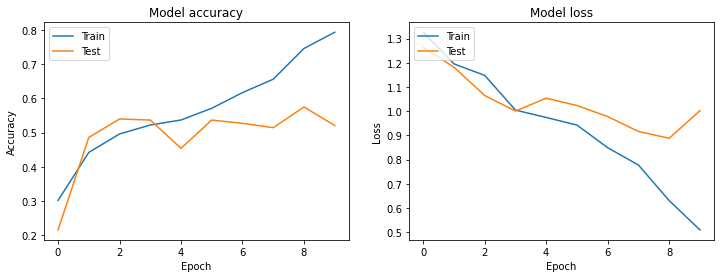

In [54]:

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS),history.history['accuracy'])
plt.plot(range(EPOCHS),history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS),history.history['loss'])
plt.plot(range(EPOCHS),history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


In [30]:
# loss : error in back propagation

## Steps to do in Task 4

To potentially improve these metrics, you could:

1.Increase Training Epochs: Train the model for more epochs to see if the performance improves.

2.Hyperparameter Tuning: Experiment with different learning rates, batch sizes, and other hyperparameters.
3.Data Augmentation: Apply more data augmentation techniques to help the model generalize better.
4.Model Architecture: Experiment with deeper or different model architectures.
5.Regularization Techniques: Apply regularization techniques like dropout to prevent overfitting.

6. Play around with the dataset, devrease the number of images in the validation set and increase the training dataset, play aound with ratios


In [ ]:
1000 = 800 ---> trainsing, 100 validation ---> 100 testing

## Additional Contet for final presentation

first image to predict
actual label: Type 1


2024-06-17 16:58:34.273184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


predicted label: Type 1


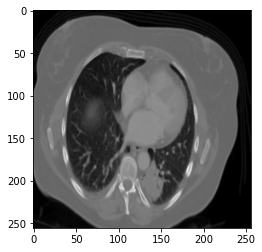

In [55]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [27]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

2024-06-17 16:59:03.498891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


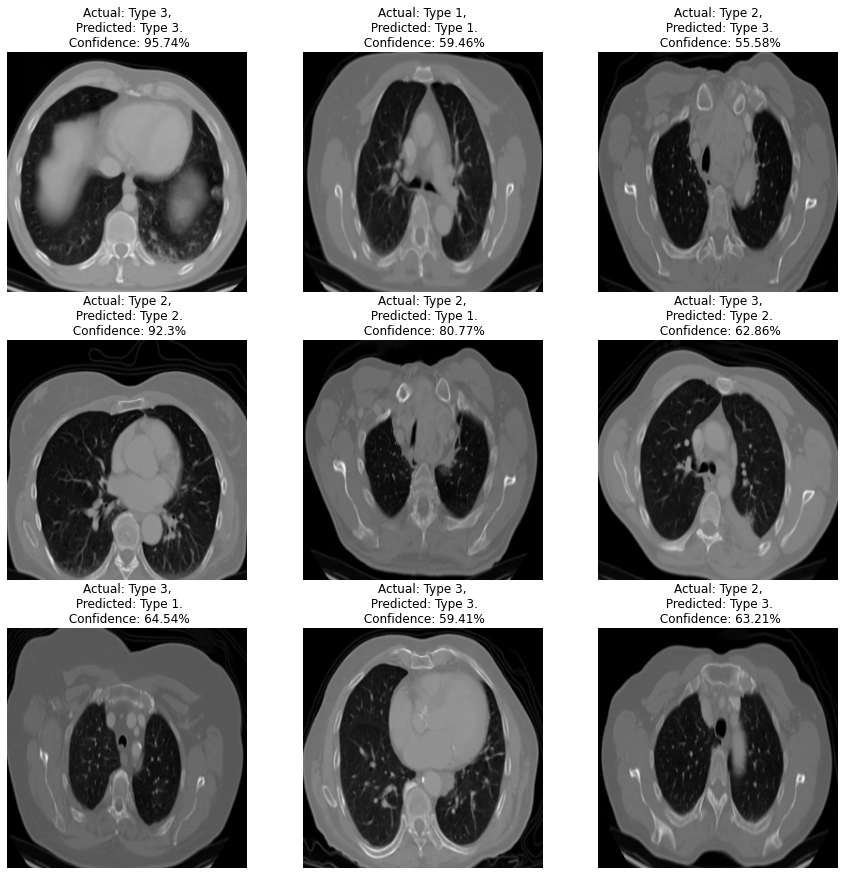

In [56]:
plt.figure(figsize=(15, 15))

for images, labels in test_ds.take(1):
    batch_size = images.shape[0]  # Get the actual batch size
    for i in range(min(9, batch_size)):  # Ensure we don't exceed the batch size
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

plt.show()


# Saving our Model

In [31]:
model_version = 1


In [32]:
model.save(f"{model_version}")

2024-06-17 14:20:57.461428: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: 1/assets


In [ ]:
# 1 - Importing training, testing and validation dataset
# 2 - resizing and recaleing
# 3 - Data augmentation (keep it considering performance of the model)
# 4 - Model building
# 5 - Model training 
# 6 - Preding images with confidence